### Análisis exploratorio de datos

Analizamos cada una de las tablas.
1. Porcentaje de nulos.
2. Cantidad de filas.
3. Posibles relaciones entre tablas.

In [2]:
#importamos todas las librerías necesarias.
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

In [4]:
# Leemos con pandas todas las tablas
drgcodes = pd.read_csv('./dataset/DRGCODES.csv')
labevents = pd.read_csv('./dataset/LABEVENTS.csv')
micro = pd.read_csv('./dataset/MICROBIOLOGYEVENTS.csv')
prescriptions = pd.read_csv('./dataset/PRESCRIPTIONS.csv')
procedures = pd.read_csv('./dataset/PROCEDURES_ICD.csv')

In [5]:
admissions = pd.read_csv('./dataset/Admissions.csv')
callout = pd.read_csv('./dataset/callout.csv')
icustays = pd.read_csv('./dataset/icustays.csv')
patients = pd.read_csv('./dataset/patients.csv')
services = pd.read_csv('./dataset/services.csv')

In [6]:
caregivers = pd.read_csv('./dataset/CAREGIVERS.csv')
chartevents = pd.read_csv('./dataset/CHARTEVENTS.csv')
datetimeevents = pd.read_csv('./dataset/DATETIMEEVENTS.csv')
imputeventscv = pd.read_csv('./dataset/INPUTEVENTS_CV.csv')
imputeventsmv = pd.read_csv('./dataset/INPUTEVENTS_MV.csv')
transfers = pd.read_csv('./dataset/TRANSFERS.csv')


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25092\2777192682.py:2: DtypeWarning: Columns (8,10,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  chartevents = pd.read_csv('./dataset/CHARTEVENTS.csv')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25092\2777192682.py:4: DtypeWarning: Columns (17,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  imputeventscv = pd.read_csv('./dataset/INPUTEVENTS_CV.csv')


In [7]:
dcpt = pd.read_csv('./dataset/D_CPT.csv')
ddiagnoses = pd.read_csv('./dataset/D_ICD_DIAGNOSES.csv')
dprocedures = pd.read_csv('./dataset/D_ICD_PROCEDURES.csv')
ditems = pd.read_csv('./dataset/D_ITEMS.csv')
dlabitems = pd.read_csv('./dataset/D_LABITEMS.csv')

In [9]:
noteevents= pd.read_csv('./dataset/NOTEEVENTS.csv')
outputevents= pd.read_csv('./dataset/OUTPUTEVENTS.csv')
procedureevents_mv = pd.read_csv('./dataset/PROCEDUREEVENTS_MV.csv')
cptevents = pd.read_csv('./dataset/CPTEVENTS.csv')
diagnoses_icd = pd.read_csv('./dataset/DIAGNOSES_ICD.csv') 


#### Tabla DRGCODES
Grupos relacionados por el diagnóstico, que el hospital utiliza para facturación

In [ ]:
drgcodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row_id         297 non-null    int64  
 1   subject_id     297 non-null    int64  
 2   hadm_id        297 non-null    int64  
 3   drg_type       297 non-null    object 
 4   drg_code       297 non-null    int64  
 5   description    297 non-null    object 
 6   drg_severity   168 non-null    float64
 7   drg_mortality  168 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 18.7+ KB


In [ ]:
drgcodes.head()

,row_id,subject_id,hadm_id,drg_type,drg_code,description,drg_severity,drg_mortality
0,1338,10130,156668,HCFA,148,MAJOR SMALL & LARGE BOWEL PROCEDURES WITH COMP...,NaN,NaN
1,2188,10114,167957,HCFA,518,PERCUTANEOUS CARDIOVASCULAR PROCEDURES WITHOUT...,NaN,NaN
2,2599,10117,187023,HCFA,185,DENTAL & ORAL DIS EXCEPT EXTRACTIONS & RESTORA...,NaN,NaN
3,2703,10046,133110,HCFA,1,CRANIOTOMY AGE >17 EXCEPT FOR TRAUMA,NaN,NaN
4,3020,10011,105331,HCFA,205,"DISORDERS OF LIVER EXCEPT MALIGNANCY, CIRRHOSI...",NaN,NaN


In [ ]:
drgcodes.drg_type.unique()

array(['HCFA', 'APR ', 'MS'], dtype=object)

In [ ]:
drgcodes.isna().sum()

row_id             0
subject_id         0
hadm_id            0
drg_type           0
drg_code           0
description        0
drg_severity     129
drg_mortality    129
dtype: int64

In [ ]:
129/297

0.43434343434343436

In [ ]:
print('HCFA: ',drgcodes[drgcodes.drg_type == 'HCFA'].isna().sum(),'\n')
print('APR: ',drgcodes[drgcodes.drg_type == 'APR'].isna().sum(),'\n')
print('MS: ',drgcodes[drgcodes.drg_type == 'MS'].isna().sum(),'\n')

HCFA:  row_id            0
subject_id        0
hadm_id           0
drg_type          0
drg_code          0
description       0
drg_severity     57
drg_mortality    57
dtype: int64 

APR:  row_id           0.0
subject_id       0.0
hadm_id          0.0
drg_type         0.0
drg_code         0.0
description      0.0
drg_severity     0.0
drg_mortality    0.0
dtype: float64 

MS:  row_id            0
subject_id        0
hadm_id           0
drg_type          0
drg_code          0
description       0
drg_severity     72
drg_mortality    72
dtype: int64 



In [ ]:
drgcodes[['drg_severity','drg_mortality']].describe()

,drg_severity,drg_mortality
count,168.000000,168.000000
mean,3.446429,3.291667
std,0.681307,0.806814
min,2.000000,1.000000
25%,3.000000,3.000000
50%,4.000000,3.000000
75%,4.000000,4.000000
max,4.000000,4.000000


#### LABEVENTS
Exámenes de laboratorio para pacientes del hospital y para consultas externas

In [ ]:
labevents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76074 entries, 0 to 76073
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   row_id      76074 non-null  int64  
 1   subject_id  76074 non-null  int64  
 2   hadm_id     61812 non-null  float64
 3   itemid      76074 non-null  int64  
 4   charttime   76074 non-null  object 
 5   value       76070 non-null  object 
 6   valuenum    67030 non-null  float64
 7   valueuom    66669 non-null  object 
 8   flag        29737 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 5.2+ MB


In [ ]:
labevents.head()

,row_id,subject_id,hadm_id,itemid,charttime,value,valuenum,valueuom,flag
0,6244563,10006,NaN,50868,2164-09-24 20:21:00,19,19.0,mEq/L,NaN
1,6244564,10006,NaN,50882,2164-09-24 20:21:00,27,27.0,mEq/L,NaN
2,6244565,10006,NaN,50893,2164-09-24 20:21:00,10.0,10.0,mg/dL,NaN
3,6244566,10006,NaN,50902,2164-09-24 20:21:00,97,97.0,mEq/L,NaN
4,6244567,10006,NaN,50912,2164-09-24 20:21:00,7.0,7.0,mg/dL,abnormal


In [ ]:
labevents.charttime.max()

'2202-10-11 04:45:00'

In [ ]:
labevents.charttime.min()

'2102-08-01 13:15:00'

In [ ]:
labevents[['value','valuenum']].describe()

,valuenum
count,67030.000000
mean,76.745849
std,634.732230
min,-29.000000
25%,4.200000
50%,18.000000
75%,60.000000
max,52950.000000


In [ ]:
labevents.value.nunique()

2794

<AxesSubplot: >

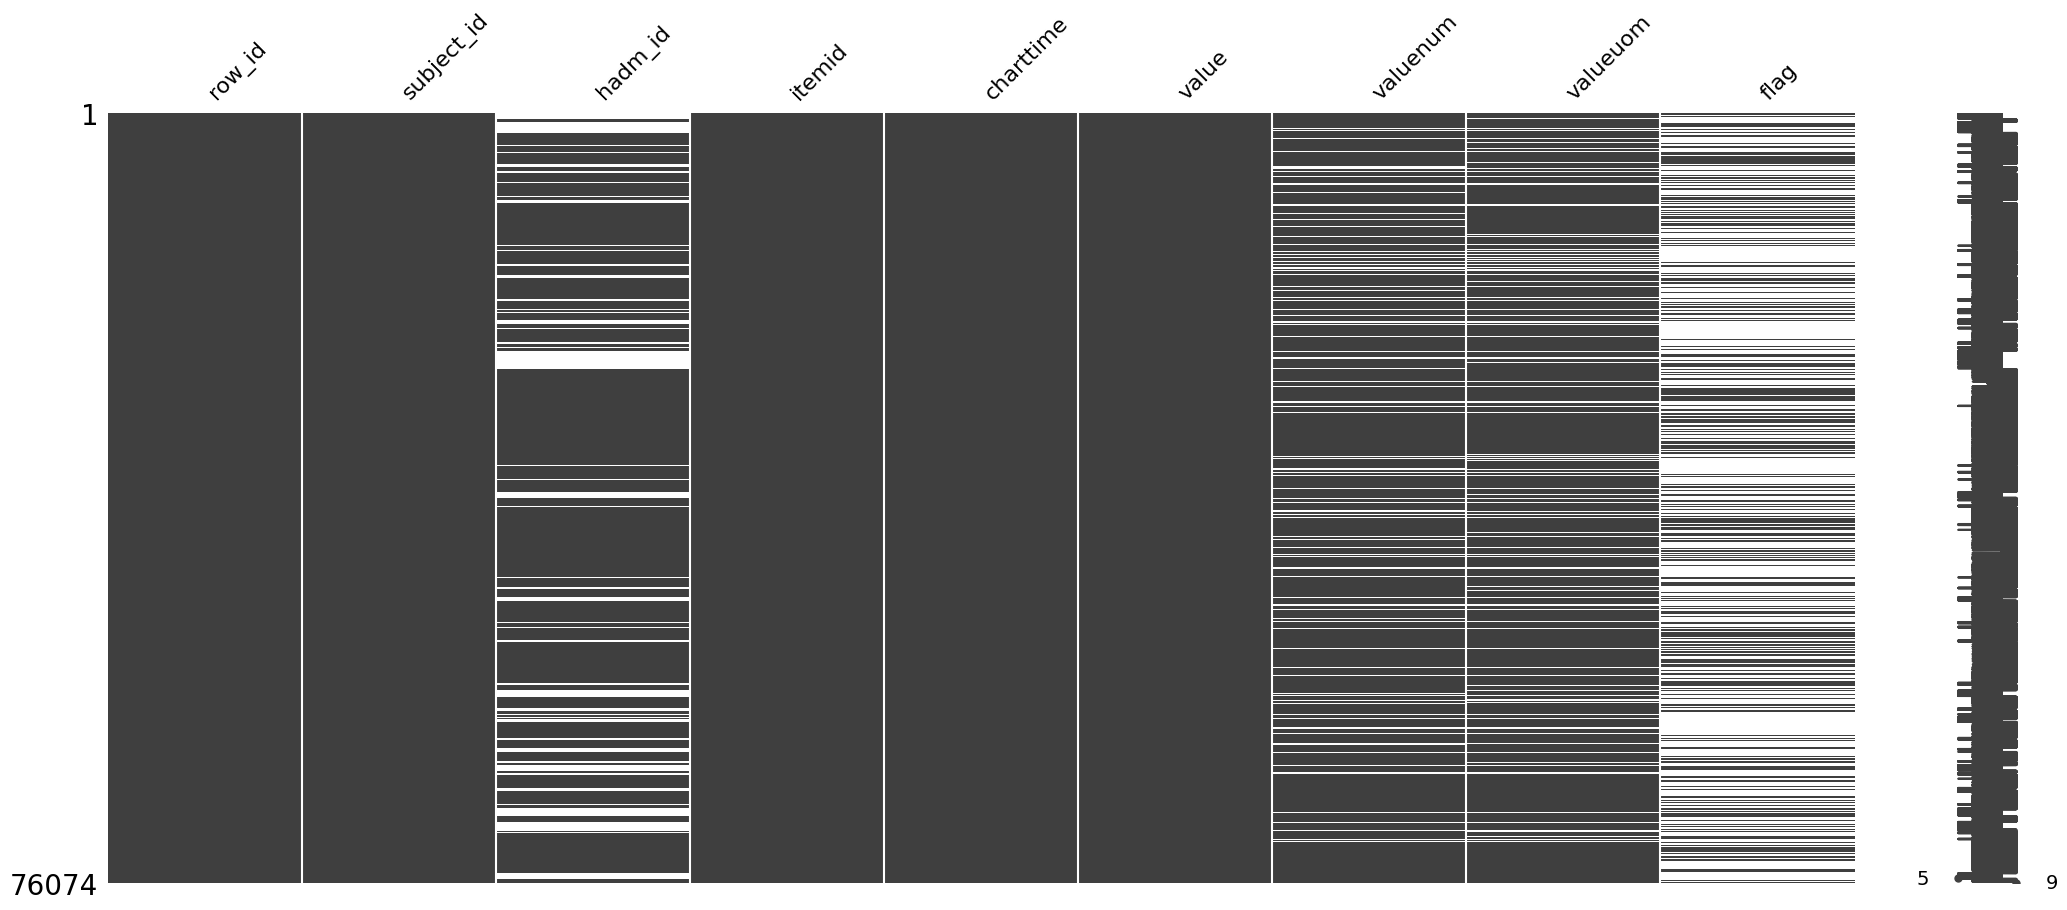

In [ ]:
msno.matrix(labevents)

In [ ]:
labevents.flag.unique()

array([nan, 'abnormal', 'delta'], dtype=object)

#### MICROBIOLOGYEVENTS
Medidas y estudios microbiológicos de la base de datos del hospital

In [ ]:
micro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2003 entries, 0 to 2002
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   row_id               2003 non-null   int64  
 1   subject_id           2003 non-null   int64  
 2   hadm_id              2003 non-null   int64  
 3   chartdate            2003 non-null   object 
 4   charttime            1912 non-null   object 
 5   spec_itemid          2003 non-null   int64  
 6   spec_type_desc       2003 non-null   object 
 7   org_itemid           1137 non-null   float64
 8   org_name             1137 non-null   object 
 9   isolate_num          1137 non-null   float64
 10  ab_itemid            971 non-null    float64
 11  ab_name              971 non-null    object 
 12  dilution_text        939 non-null    object 
 13  dilution_comparison  938 non-null    object 
 14  dilution_value       938 non-null    float64
 15  interpretation       971 non-null    o

In [ ]:
micro.head()

,row_id,subject_id,hadm_id,chartdate,charttime,spec_itemid,spec_type_desc,org_itemid,org_name,isolate_num,ab_itemid,ab_name,dilution_text,dilution_comparison,dilution_value,interpretation
0,134694,10006,142345,2164-10-23 00:00:00,2164-10-23 15:30:00,70012,BLOOD CULTURE,80155.0,"STAPHYLOCOCCUS, COAGULASE NEGATIVE",2.0,NaN,NaN,NaN,NaN,NaN,NaN
1,134695,10006,142345,2164-10-23 00:00:00,2164-10-23 15:30:00,70012,BLOOD CULTURE,80155.0,"STAPHYLOCOCCUS, COAGULASE NEGATIVE",1.0,90015.0,VANCOMYCIN,2,=,2.0,S
2,134696,10006,142345,2164-10-23 00:00:00,2164-10-23 15:30:00,70012,BLOOD CULTURE,80155.0,"STAPHYLOCOCCUS, COAGULASE NEGATIVE",1.0,90012.0,GENTAMICIN,<=0.5,<=,1.0,S
3,134697,10006,142345,2164-10-23 00:00:00,2164-10-23 15:30:00,70012,BLOOD CULTURE,80155.0,"STAPHYLOCOCCUS, COAGULASE NEGATIVE",1.0,90025.0,LEVOFLOXACIN,4,=,4.0,I
4,134698,10006,142345,2164-10-23 00:00:00,2164-10-23 15:30:00,70012,BLOOD CULTURE,80155.0,"STAPHYLOCOCCUS, COAGULASE NEGATIVE",1.0,90016.0,OXACILLIN,=>4,=>,4.0,R


<AxesSubplot: >

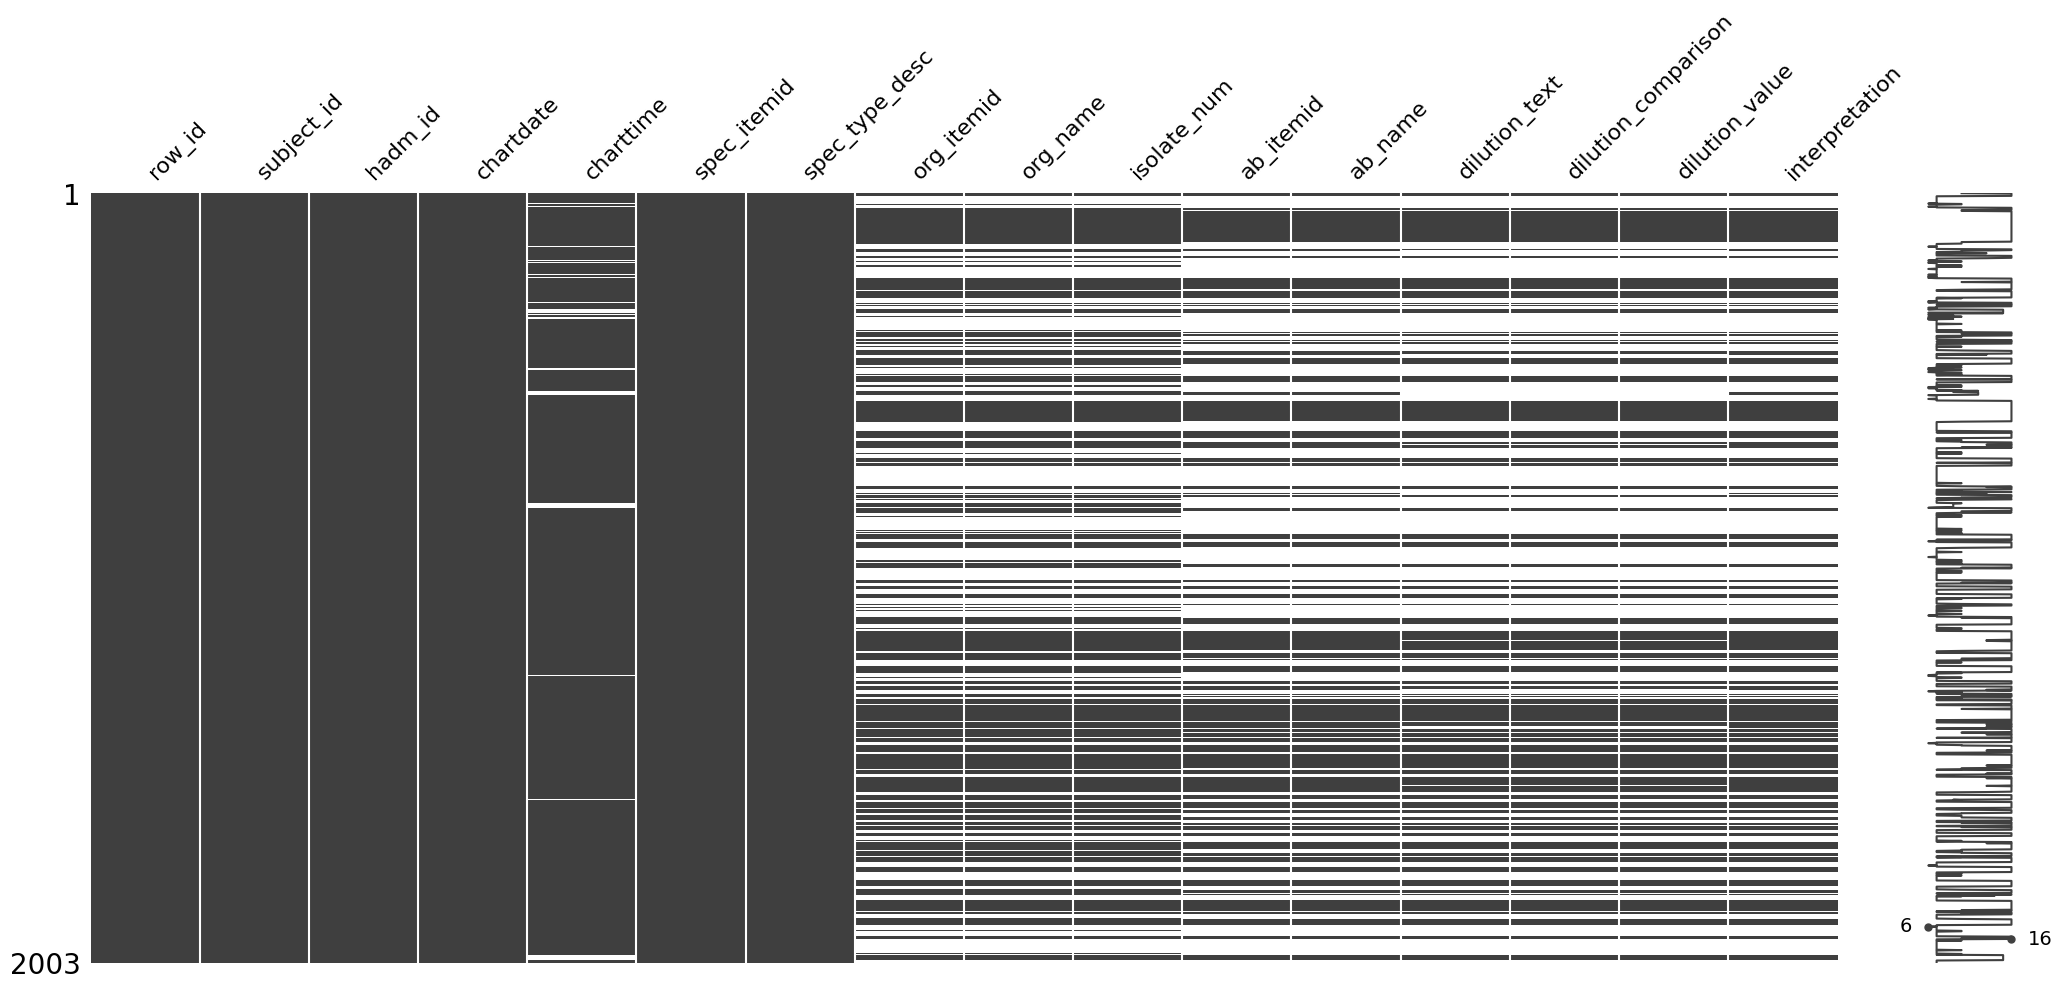

In [ ]:
msno.matrix(micro)

In [ ]:
print(micro.spec_type_desc.unique())
print(micro.spec_type_desc.nunique())

['BLOOD CULTURE' 'URINE' 'STOOL' 'PERITONEAL FLUID' 'IMMUNOLOGY'
 'CATHETER TIP-IV' 'FLUID,OTHER' 'SPUTUM' 'SWAB' 'MRSA SCREEN'
 'FLUID RECEIVED IN BLOOD CULTURE BOTTLES'
 'BLOOD CULTURE ( MYCO/F LYTIC BOTTLE)' 'CSF;SPINAL FLUID'
 'Influenza A/B by DFA' 'BRONCHOALVEOLAR LAVAGE' 'SEROLOGY/BLOOD'
 'THROAT CULTURE' 'ASPIRATE' 'Blood (CMV AB)' 'Blood (Toxo)' 'Blood (EBV)'
 'Immunology (CMV)' 'TISSUE' 'PLEURAL FLUID' 'BILE'
 'BONE MARROW - CYTOGENETICS' 'Rapid Respiratory Viral Screen & Culture'
 'CORNEAL EYE SCRAPINGS'
 'Direct Antigen Test for Herpes Simplex Virus Types 1 & 2'
 'SKIN SCRAPINGS' 'DIRECT ANTIGEN TEST FOR VARICELLA-ZOSTER VIRUS'
 'FOOT CULTURE' 'Mini-BAL' 'JOINT FLUID']
34


In [ ]:
print(micro.org_name.unique())
print(micro.org_name.nunique())

['STAPHYLOCOCCUS, COAGULASE NEGATIVE' nan 'YEAST'
 'GRAM POSITIVE COCCUS(COCCI)' 'ENTEROCOCCUS FAECALIS'
 'STREPTOCOCCUS SPECIES' 'ENTEROCOCCUS SP.' 'ENTEROBACTERIACEAE'
 'ESCHERICHIA COLI' 'SERRATIA MARCESCENS' 'BETA STREPTOCOCCUS GROUP B'
 'STREPTOCOCCUS PNEUMONIAE' 'CLOSTRIDIUM DIFFICILE'
 'CANDIDA ALBICANS, PRESUMPTIVE IDENTIFICATION' 'GRAM NEGATIVE ROD(S)'
 'STAPH AUREUS COAG +' 'ASPERGILLUS SP. NOT FUMIGATUS, FLAVUS OR NIGER'
 'BACTEROIDES FRAGILIS GROUP' 'ANAEROBIC GRAM POSITIVE ROD(S)'
 'ENTEROCOCCUS FAECIUM' 'KLEBSIELLA PNEUMONIAE' 'GRAM POSITIVE RODS'
 'MYCOBACTERIUM AVIUM COMPLEX' 'PRESUMPTIVE STREPTOCOCCUS BOVIS'
 'CORYNEBACTERIUM SPECIES (DIPHTHEROIDS)' 'KLEBSIELLA OXYTOCA'
 'GRAM POSITIVE BACTERIA' 'STENOTROPHOMONAS (XANTHOMONAS) MALTOPHILIA'
 'GRAM NEGATIVE ROD #2' 'PROTEUS SPECIES' 'ALPHA STREPTOCOCCI'
 'PROBABLE ENTEROCOCCUS' 'LACTOBACILLUS SPECIES'
 'POSITIVE FOR METHICILLIN RESISTANT STAPH AUREUS' 'ORGANISM'
 'MYCELIA STERILIA' 'CORYNEBACTERIUM STRIATUM' 'PSEUDOMONAS

In [ ]:
micro.describe()

,row_id,subject_id,hadm_id,spec_itemid,org_itemid,isolate_num,ab_itemid,dilution_value
count,2003.000000,2003.000000,2003.000000,2003.000000,1137.000000,1137.000000,971.000000,938.000000
mean,304516.587119,28243.860709,153753.887668,70051.511732,80057.037819,1.174142,90016.499485,9.151386
std,147081.229153,15823.179765,28441.354241,29.208391,84.880298,0.513480,7.824410,22.293389
min,134694.000000,10006.000000,100375.000000,70005.000000,80002.000000,1.000000,90002.000000,0.000000
25%,135686.500000,10111.500000,132349.000000,70012.000000,80004.000000,1.000000,90011.000000,1.000000
50%,426902.000000,40310.000000,157466.000000,70062.000000,80023.000000,1.000000,90017.000000,2.000000
75%,432369.500000,41976.000000,177759.000000,70079.000000,80071.000000,1.000000,90023.000000,8.000000
max,439864.000000,44228.000000,199207.000000,70093.000000,80304.000000,4.000000,90031.000000,256.000000


In [ ]:
print(micro.ab_name.unique())
print(micro.ab_name.nunique())

[nan 'VANCOMYCIN' 'GENTAMICIN' 'LEVOFLOXACIN' 'OXACILLIN' 'TETRACYCLINE'
 'ERYTHROMYCIN' 'PENICILLIN' 'AMPICILLIN' 'NITROFURANTOIN' 'IMIPENEM'
 'PIPERACILLIN' 'CEFTRIAXONE' 'CIPROFLOXACIN' 'CEFTAZIDIME'
 'TRIMETHOPRIM/SULFA' 'MEROPENEM' 'TOBRAMYCIN' 'CEFEPIME'
 'PIPERACILLIN/TAZO' 'CEFUROXIME' 'AMPICILLIN/SULBACTAM' 'CEFAZOLIN'
 'LINEZOLID' 'CLINDAMYCIN' 'RIFAMPIN' 'CHLORAMPHENICOL' 'PENICILLIN G'
 'AMIKACIN']
28


In [ ]:
micro.interpretation.unique()

array([nan, 'S', 'I', 'R'], dtype=object)

#### PRESCRIPTIONS
Órdenes de medicamentos, no siempre administradas, para un paciente

In [ ]:
prescriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10398 entries, 0 to 10397
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   row_id             10398 non-null  int64  
 1   subject_id         10398 non-null  int64  
 2   hadm_id            10398 non-null  int64  
 3   icustay_id         7046 non-null   float64
 4   startdate          10398 non-null  object 
 5   enddate            10397 non-null  object 
 6   drug_type          10398 non-null  object 
 7   drug               10398 non-null  object 
 8   drug_name_poe      5766 non-null   object 
 9   drug_name_generic  5772 non-null   object 
 10  formulary_drug_cd  10397 non-null  object 
 11  gsn                9122 non-null   float64
 12  ndc                10397 non-null  float64
 13  prod_strength      10398 non-null  object 
 14  dose_val_rx        10398 non-null  object 
 15  dose_unit_rx       10398 non-null  object 
 16  form_val_disp      103

In [ ]:
prescriptions.head()

,row_id,subject_id,hadm_id,icustay_id,startdate,enddate,drug_type,drug,drug_name_poe,drug_name_generic,formulary_drug_cd,gsn,ndc,prod_strength,dose_val_rx,dose_unit_rx,form_val_disp,form_unit_disp,route
0,32600,42458,159647,NaN,2146-07-21 00:00:00,2146-07-22 00:00:00,MAIN,Pneumococcal Vac Polyvalent,Pneumococcal Vac Polyvalent,PNEUMOcoccal Vac Polyvalent,PNEU25I,48548.0,6494300.0,25mcg/0.5mL Vial,0.5,mL,1,VIAL,IM
1,32601,42458,159647,NaN,2146-07-21 00:00:00,2146-07-22 00:00:00,MAIN,Bisacodyl,Bisacodyl,Bisacodyl,BISA5,2947.0,536338101.0,5 mg Tab,10,mg,2,TAB,PO
2,32602,42458,159647,NaN,2146-07-21 00:00:00,2146-07-22 00:00:00,MAIN,Bisacodyl,Bisacodyl,Bisacodyl (Rectal),BISA10R,2944.0,574705050.0,10mg Suppository,10,mg,1,SUPP,PR
3,32603,42458,159647,NaN,2146-07-21 00:00:00,2146-07-22 00:00:00,MAIN,Senna,Senna,Senna,SENN187,19964.0,904516561.0,1 Tablet,1,TAB,1,TAB,PO
4,32604,42458,159647,NaN,2146-07-21 00:00:00,2146-07-21 00:00:00,MAIN,Docusate Sodium (Liquid),Docusate Sodium (Liquid),Docusate Sodium (Liquid),DOCU100L,3017.0,121054410.0,100mg UD Cup,100,mg,1,UDCUP,PO


<AxesSubplot: >

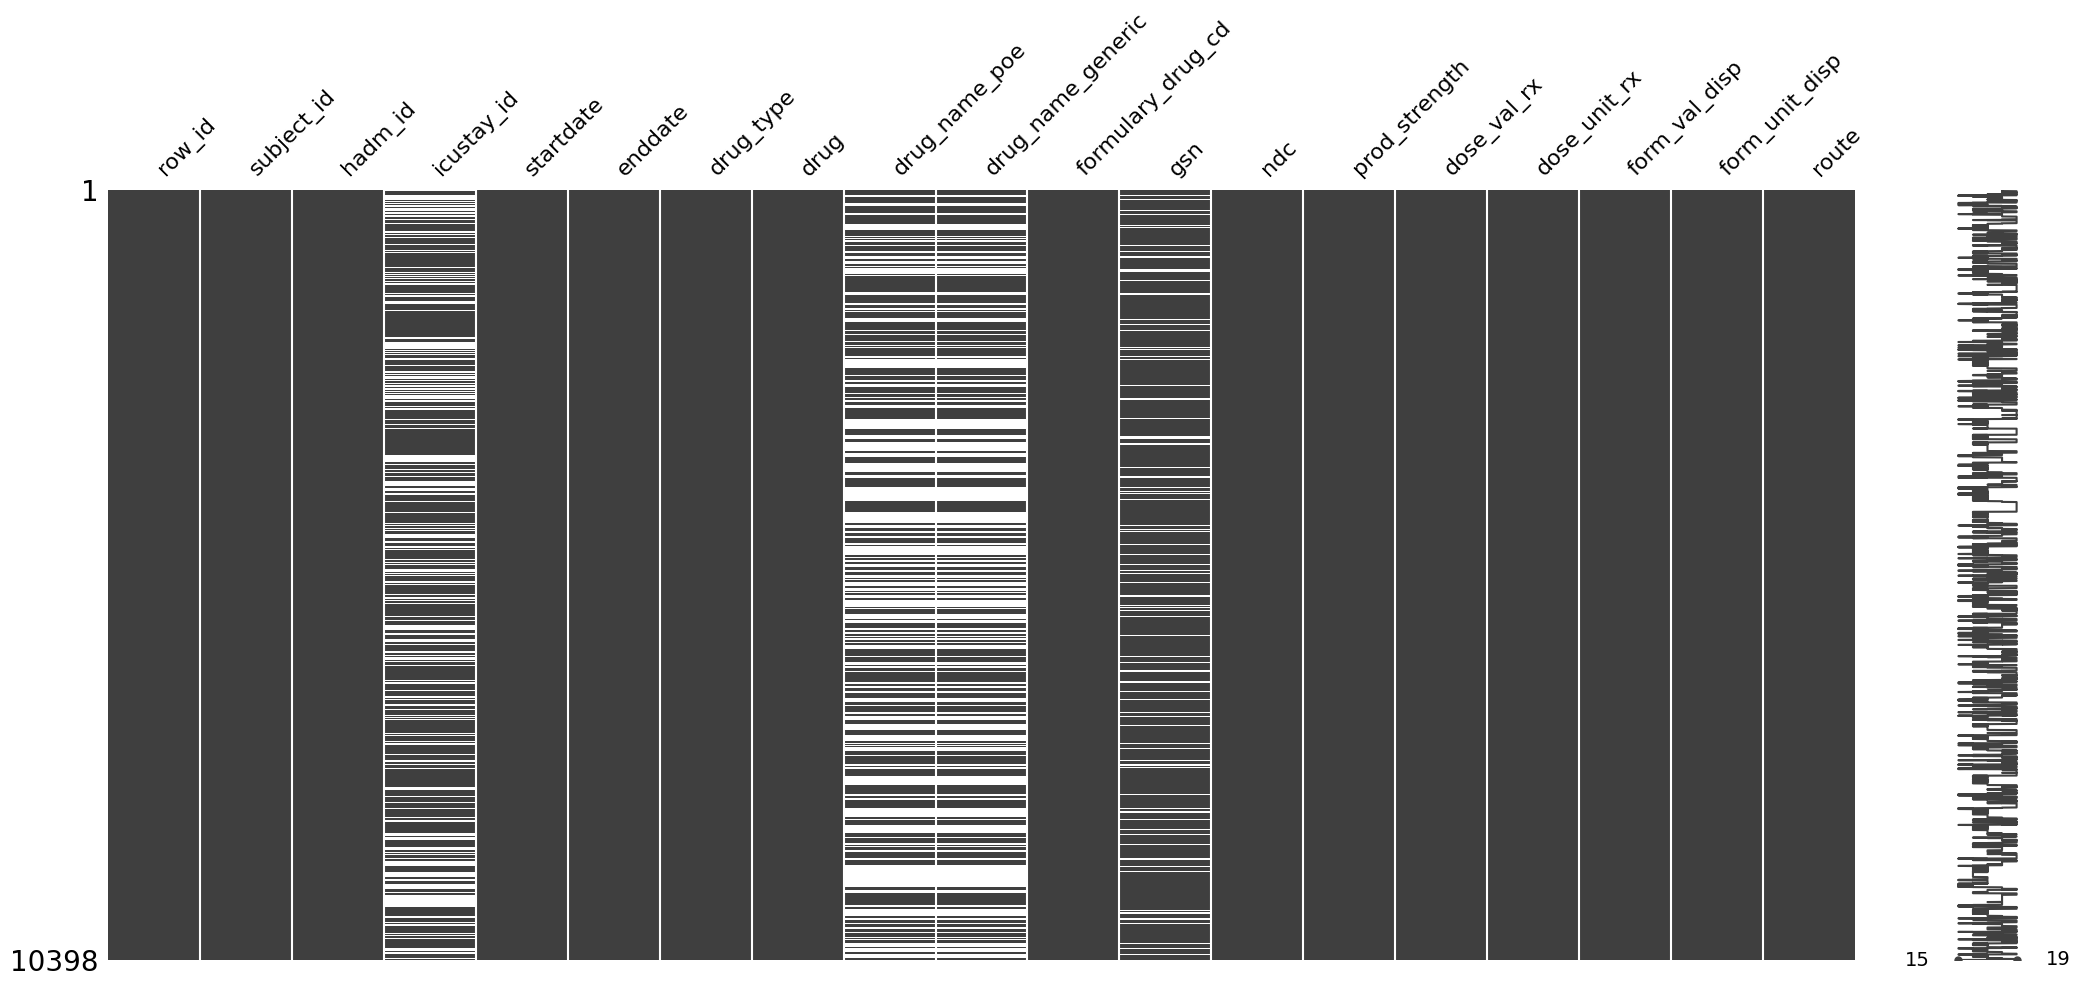

In [ ]:
msno.matrix(prescriptions)

In [ ]:
prescriptions.drug_type.unique()

array(['MAIN', 'BASE', 'ADDITIVE'], dtype=object)

In [ ]:
print(prescriptions.route.unique())
print(prescriptions.route.nunique())

['IM' 'PO' 'PR' 'SC' 'ORAL' 'IV' 'IH' 'NU' 'IV DRIP' 'TP' 'OU' 'NG' 'OD'
 'OS' 'ID' 'VG' 'IVPCA' 'J TUBE' 'IV BOLUS' 'BOTH EYES' 'RIGHT EYE' 'SL'
 'TD' 'PB' 'NEB' 'IJ' 'DIALYS' 'IRR' 'REPLACE' 'SUBCUT' 'OG' 'PO/NG' 'IR'
 'ED' 'DWELL' 'LEFT EYE' 'IT']
37


#### PROCEDURES_ICD
Procedimientos de los pacientes usando el ICD(International Statistical Classification of Diseases DNA Related Health Problems )

In [ ]:
procedures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   row_id      506 non-null    int64
 1   subject_id  506 non-null    int64
 2   hadm_id     506 non-null    int64
 3   seq_num     506 non-null    int64
 4   icd9_code   506 non-null    int64
dtypes: int64(5)
memory usage: 19.9 KB


In [ ]:
procedures.head()

,row_id,subject_id,hadm_id,seq_num,icd9_code
0,3994,10114,167957,1,3605
1,3995,10114,167957,2,3722
2,3996,10114,167957,3,8856
3,3997,10114,167957,4,9920
4,3998,10114,167957,5,9671


In [ ]:
procedures.icd9_code.nunique()

164

#### **Diccionarios**


#### D_CPT
Diccionario de alto nivel de los códigos CPT

In [ ]:
dcpt.head()

,row_id,category,sectionrange,sectionheader,subsectionrange,subsectionheader,codesuffix,mincodeinsubsection,maxcodeinsubsection
0,1,1,99201-99499,Evaluation and management,99201-99216,Office/other outpatient services,NaN,99201,99216
1,2,1,99201-99499,Evaluation and management,99217-99220,Hospital observation services,NaN,99217,99220
2,3,1,99201-99499,Evaluation and management,99221-99239,Hospital inpatient services,NaN,99221,99239
3,4,1,99201-99499,Evaluation and management,99241-99255,Consultations,NaN,99241,99255
4,5,1,99201-99499,Evaluation and management,99261-99263,Follow-up inpatient consultations (deleted codes),NaN,99261,99263


In [ ]:
dcpt['sectionheader'].value_counts()

Medicine                     32
Evaluation and management    25
Anesthesia                   22
Surgery                      19
Pathology and laboratory     18
Performance measurement       9
Radiology                     7
Emerging technology           2
Name: sectionheader, dtype: int64

In [ ]:
dcpt['subsectionheader'].value_counts()

Temporary codes                    2
Other procedures                   2
Anatomic pathology (postmortem)    1
Gastroenterology                   1
Dialysis                           1
                                  ..
Upper arm and elbow                1
Shoulder and axillary              1
Lower leg (below knee)             1
Knee and popliteal area            1
Diagnostic imaging                 1
Name: subsectionheader, Length: 132, dtype: int64

In [ ]:
dcpt.describe()

,row_id,category,mincodeinsubsection,maxcodeinsubsection
count,134.000000,134.000000,134.000000,134.000000
mean,67.500000,1.097015,65792.402985,66403.567164
std,38.826537,0.344001,39157.187754,38905.125916
min,1.000000,1.000000,1.000000,15.000000
25%,34.250000,1.000000,30752.500000,34199.000000
50%,67.500000,1.000000,87500.500000,88049.000000
75%,100.750000,1.000000,98955.000000,98957.250000
max,134.000000,3.000000,99605.000000,99607.000000


In [ ]:
dcpt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   row_id               134 non-null    int64 
 1   category             134 non-null    int64 
 2   sectionrange         134 non-null    object
 3   sectionheader        134 non-null    object
 4   subsectionrange      134 non-null    object
 5   subsectionheader     134 non-null    object
 6   codesuffix           11 non-null     object
 7   mincodeinsubsection  134 non-null    int64 
 8   maxcodeinsubsection  134 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 9.5+ KB


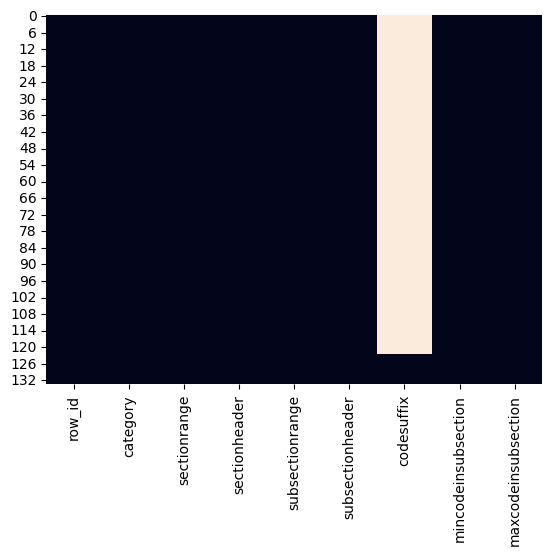

In [ ]:
sns.heatmap(dcpt.isnull(), cbar=False)
plt.show()

#### D_ICD_DIAGNOSES
Diccionario de los diagnósticos según el ICD

In [ ]:
ddiagnoses.head()

,row_id,icd9_code,short_title,long_title
0,1,01716,Erythem nod tb-oth test,Erythema nodosum with hypersensitivity reactio...
1,2,01720,TB periph lymph-unspec,"Tuberculosis of peripheral lymph nodes, unspec..."
2,3,01721,TB periph lymph-no exam,"Tuberculosis of peripheral lymph nodes, bacter..."
3,4,01722,TB periph lymph-exam unk,"Tuberculosis of peripheral lymph nodes, bacter..."
4,5,01723,TB periph lymph-micro dx,"Tuberculosis of peripheral lymph nodes, tuberc..."


In [ ]:
ddiagnoses['short_title'].value_counts()

Op skl vlt fx-concus NOS    5
Op skl base fx-deep coma    5
Cl skl fx NEC-proln coma    5
Cl skul base fx-mod coma    5
Cl skul base fx w/o coma    5
                           ..
Enlargement of orbit        1
Orbit deform d/t trauma     1
Enophthalmos NOS            1
Enophth d/t orbit atrphy    1
Contact/exp algae bloom     1
Name: short_title, Length: 14328, dtype: int64

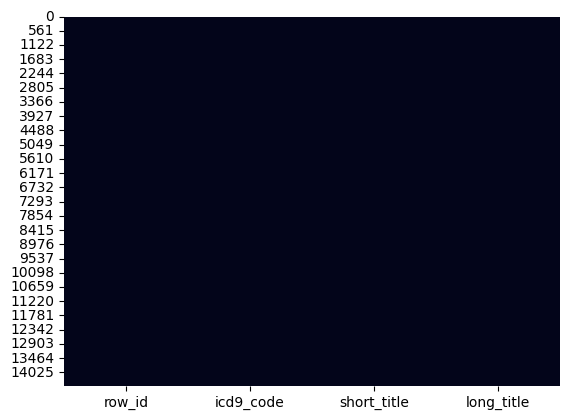

In [ ]:
sns.heatmap(ddiagnoses.isnull(), cbar=False)
plt.show()

#### D_ICD_PROCEDURES 
Diccionario de procedimientos según el ICD

In [ ]:
dprocedures.head()

,row_id,icd9_code,short_title,long_title
0,1,1423,Chorioret les xenon coag,Destruction of chorioretinal lesion by xenon a...
1,2,1424,Chorioret les laser coag,Destruction of chorioretinal lesion by laser p...
2,3,1425,Chorioret les p/coag NOS,Destruction of chorioretinal lesion by photoco...
3,4,1426,Chorioret les radiother,Destruction of chorioretinal lesion by radiati...
4,5,1427,Chorioret les rad implan,Destruction of chorioretinal lesion by implant...


In [ ]:
dprocedures['short_title'].value_counts()

Chorioret les xenon coag    1
Sutur flex tend hand NEC    1
Open reduc-dislocat NOS     1
Opn reduc disloc-shouldr    1
Open reduc-elbow disloc     1
                           ..
Exc,destrct,exclus LAA      1
Exc/dest hrt les, thrspc    1
Impl cardiac support dev    1
Heart/pericard repr NEC     1
Micro exam NEC              1
Name: short_title, Length: 3882, dtype: int64

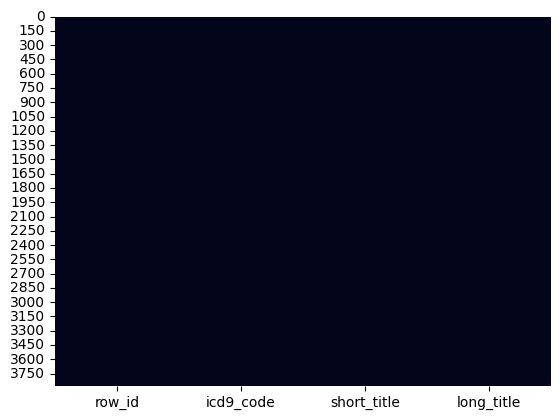

In [ ]:
sns.heatmap(dprocedures.isnull(), cbar=False)
plt.show()

#### D_ITEMS
Diccionario de ITEMIDS, excepto las relativas a pruebas de laboratorio

In [ ]:
ditems.head()

,row_id,itemid,label,abbreviation,dbsource,linksto,category,unitname,param_type,conceptid
0,1,1435,Sustained Nystamus,NaN,carevue,chartevents,NaN,NaN,NaN,NaN
1,2,1436,Tactile Disturbances,NaN,carevue,chartevents,NaN,NaN,NaN,NaN
2,3,1437,Tremor,NaN,carevue,chartevents,NaN,NaN,NaN,NaN
3,4,1438,Ulnar Pulse [Right],NaN,carevue,chartevents,NaN,NaN,NaN,NaN
4,5,1439,Visual Disturbances,NaN,carevue,chartevents,NaN,NaN,NaN,NaN


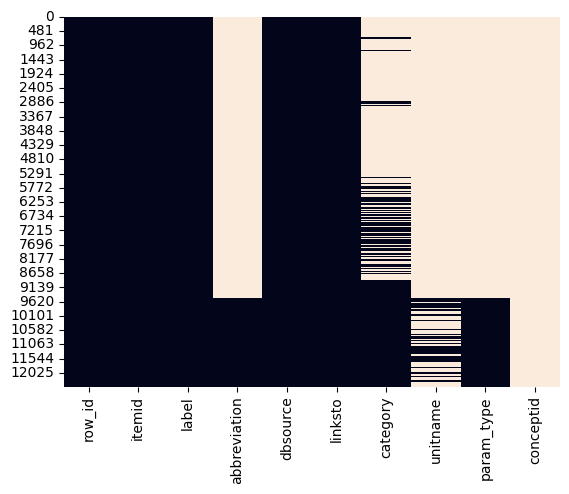

In [ ]:
sns.heatmap(ditems.isnull(), cbar=False)
plt.show()

#### D_LABITEMS
Diccionario de ITEMIDs relacionado a las pruebas de laboratorio

In [ ]:
dlabitems.head()

,row_id,itemid,label,fluid,category,loinc_code
0,1,50800,SPECIMEN TYPE,BLOOD,BLOOD GAS,NaN
1,2,50801,Alveolar-arterial Gradient,Blood,Blood Gas,19991-9
2,3,50802,Base Excess,Blood,Blood Gas,11555-0
3,4,50803,"Calculated Bicarbonate, Whole Blood",Blood,Blood Gas,1959-6
4,5,50804,Calculated Total CO2,Blood,Blood Gas,34728-6


In [ ]:
dlabitems['category'].value_counts()

Hematology    410
Chemistry     274
Blood Gas      34
CHEMISTRY      19
HEMATOLOGY     13
BLOOD GAS       3
Name: category, dtype: int64

In [ ]:
dlabitems['fluid'].value_counts()

Blood                        359
Urine                        103
Other Body Fluid              82
Bone Marrow                   40
Ascites                       37
Pleural                       35
Cerebrospinal Fluid (CSF)     30
Joint Fluid                   26
BLOOD                         15
OTHER BODY FLUID               9
Stool                          6
URINE                          6
JOINT FLUID                    2
CSF                            1
ASCITES                        1
STOOL                          1
Name: fluid, dtype: int64

In [ ]:
dlabitems['label'].value_counts()

VOIDED SPECIMEN             12
Eosinophils                  7
Metamyelocytes               6
Atypical Lymphocytes         6
Bands                        6
                            ..
Uptake Ratio                 1
Urea Nitrogen                1
Uric Acid                    1
Valproic Acid                1
SURFACTANT ALBUMIN RATIO     1
Name: label, Length: 589, dtype: int64

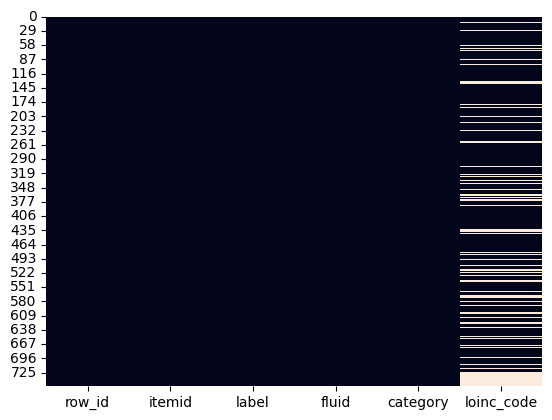

In [ ]:
sns.heatmap(dlabitems.isnull(), cbar=False)
plt.show()

In [ ]:
noteevents= pd.read_csv('NOTEEVENTS.csv')

In [ ]:
outputevents= pd.read_csv('OUTPUTEVENTS.csv')

In [ ]:
# Muestra las primeras filas del dataset
outputevents.head()

,row_id,subject_id,hadm_id,icustay_id,charttime,itemid,value,valueuom,storetime,cgid,stopped,newbottle,iserror
0,6540,10114,167957,234989.0,2171-10-30 20:00:00,40055,39.0,ml,2171-10-30 20:38:00,15029,NaN,NaN,NaN
1,6541,10114,167957,234989.0,2171-10-30 21:00:00,40055,35.0,ml,2171-10-30 21:18:00,15029,NaN,NaN,NaN
2,6542,10114,167957,234989.0,2171-10-30 23:00:00,40055,100.0,ml,2171-10-30 23:31:00,15029,NaN,NaN,NaN
3,6543,10114,167957,234989.0,2171-10-31 00:00:00,40055,45.0,ml,2171-10-31 00:24:00,15029,NaN,NaN,NaN
4,6544,10114,167957,234989.0,2171-10-31 02:00:00,40055,80.0,ml,2171-10-31 02:02:00,15029,NaN,NaN,NaN


In [ ]:
# Muestra información del dataset, incluyendo el número de filas, columnas y tipos de datos
outputevents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11320 entries, 0 to 11319
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   row_id      11320 non-null  int64  
 1   subject_id  11320 non-null  int64  
 2   hadm_id     11320 non-null  int64  
 3   icustay_id  11319 non-null  float64
 4   charttime   11320 non-null  object 
 5   itemid      11320 non-null  int64  
 6   value       11160 non-null  float64
 7   valueuom    11273 non-null  object 
 8   storetime   11320 non-null  object 
 9   cgid        11320 non-null  int64  
 10  stopped     0 non-null      float64
 11  newbottle   0 non-null      float64
 12  iserror     0 non-null      float64
dtypes: float64(5), int64(5), object(3)
memory usage: 1.1+ MB


In [ ]:
# Calcula algunas estadísticas básicas de las variables numéricas
outputevents.describe()

,row_id,subject_id,hadm_id,icustay_id,itemid,value,cgid,stopped,newbottle,iserror
count,1.132000e+04,11320.000000,11320.000000,11319.000000,11320.000000,11160.000000,11320.000000,0.0,0.0,0.0
mean,2.097393e+06,24529.460159,153376.339841,249052.526637,124305.511307,165.486828,17860.258304,NaN,NaN,NaN
std,1.068185e+06,15952.228507,25903.016141,25952.212351,92762.133239,461.258910,2199.826356,NaN,NaN,NaN
min,6.540000e+03,10006.000000,100375.000000,201006.000000,40049.000000,0.000000,14023.000000,NaN,NaN,NaN
25%,1.410478e+06,10088.000000,134993.000000,228977.000000,40055.000000,30.000000,15843.000000,NaN,NaN,NaN
50%,2.154114e+06,10126.000000,157609.000000,249805.000000,40292.000000,80.000000,17706.000000,NaN,NaN,NaN
75%,3.005801e+06,41976.000000,172082.000000,271544.000000,226559.000000,150.000000,19783.000000,NaN,NaN,NaN
max,4.226042e+06,44228.000000,199395.000000,298685.000000,227701.000000,28000.000000,21570.000000,NaN,NaN,NaN


EL VALOR 28000 DE LA COLUMNA VALUES PARECE OUT. EL VALOR ANTERIOR MAS GRANDE ES 5200

In [ ]:
# Cuenta el número de valores nulos en cada columna
outputevents.isnull().sum()

row_id            0
subject_id        0
hadm_id           0
icustay_id        1
charttime         0
itemid            0
value           160
valueuom         47
storetime         0
cgid              0
stopped       11320
newbottle     11320
iserror       11320
dtype: int64

C:\Users\W10-PC\AppData\Local\Temp\ipykernel_16156\3330174260.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(outputevents.corr(), annot=True)


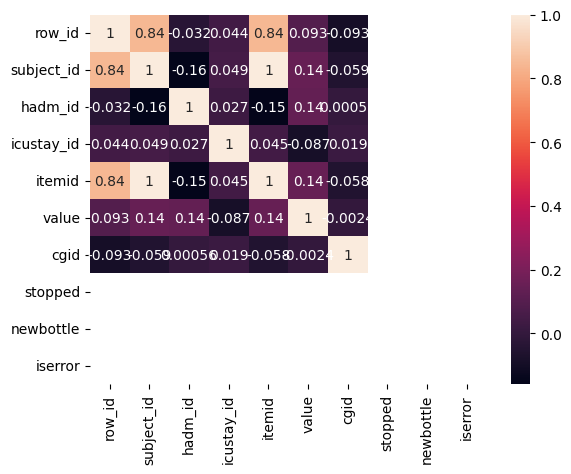

In [ ]:
# Gráfico de matriz de correlación
sns.heatmap(outputevents.corr(), annot=True)
plt.show()

In [ ]:
procedureevents_mv.head()

,row_id,subject_id,hadm_id,icustay_id,starttime,endtime,itemid,value,valueuom,location,...,ordercategoryname,secondaryordercategoryname,ordercategorydescription,isopenbag,continueinnextdept,cancelreason,statusdescription,comments_editedby,comments_canceledby,comments_date
0,8641,42367,139932,250305,2147-10-03 16:40:00,2147-10-06 20:00:00,224263,4520,min,Right Femoral.,...,Invasive Lines,NaN,Task,1,0,0,FinishedRunning,NaN,NaN,NaN
1,8642,42367,139932,250305,2147-10-03 16:41:00,2147-10-12 16:38:00,225204,12957,min,Right Antecube,...,Invasive Lines,NaN,Task,1,0,0,FinishedRunning,NaN,NaN,NaN
2,8643,42367,139932,250305,2147-10-03 17:10:00,2147-10-18 15:15:00,225792,21485,min,NaN,...,Ventilation,NaN,Task,1,0,0,FinishedRunning,NaN,NaN,NaN
3,8644,42367,139932,250305,2147-10-04 11:00:00,2147-10-04 11:01:00,221214,1,None,NaN,...,Imaging,NaN,Electrolytes,0,0,0,FinishedRunning,NaN,NaN,NaN
4,8645,42367,139932,250305,2147-10-04 14:16:00,2147-10-04 14:17:00,221223,1,None,NaN,...,Procedures,NaN,Electrolytes,0,0,0,FinishedRunning,NaN,NaN,NaN


In [ ]:
valores_edad = procedureevents_mv["statusdescription"].unique()

print(valores_edad)

['FinishedRunning' 'Rewritten' 'Paused' 'Stopped']


In [ ]:
procedureevents_mv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   row_id                      753 non-null    int64  
 1   subject_id                  753 non-null    int64  
 2   hadm_id                     753 non-null    int64  
 3   icustay_id                  753 non-null    int64  
 4   starttime                   753 non-null    object 
 5   endtime                     753 non-null    object 
 6   itemid                      753 non-null    int64  
 7   value                       753 non-null    int64  
 8   valueuom                    753 non-null    object 
 9   location                    118 non-null    object 
 10  locationcategory            118 non-null    object 
 11  storetime                   753 non-null    object 
 12  cgid                        753 non-null    int64  
 13  orderid                     753 non

In [ ]:
procedureevents_mv.describe()

,row_id,subject_id,hadm_id,icustay_id,itemid,value,cgid,orderid,linkorderid,secondaryordercategoryname,isopenbag,continueinnextdept,cancelreason
count,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,7.530000e+02,7.530000e+02,0.0,753.000000,753.0,753.000000
mean,51691.683931,42225.608234,150339.880478,249563.475432,224765.215139,1580.416999,18173.418327,4.756905e+06,4.742526e+06,NaN,0.401062,0.0,0.035857
std,41537.435143,1313.460256,28845.587052,30016.762589,1330.645212,3792.474381,2282.737667,2.872627e+06,2.872255e+06,NaN,0.490439,0.0,0.212733
min,8641.000000,40124.000000,100969.000000,201204.000000,221214.000000,1.000000,14037.000000,1.127400e+04,1.127400e+04,NaN,0.000000,0.0,0.000000
25%,22229.000000,41795.000000,125157.000000,220671.000000,224275.000000,1.000000,16139.000000,2.336760e+06,2.315887e+06,NaN,0.000000,0.0,0.000000
50%,36875.000000,42075.000000,151323.000000,250305.000000,225401.000000,1.000000,18240.000000,4.532366e+06,4.485146e+06,NaN,0.000000,0.0,0.000000
75%,65258.000000,43746.000000,174245.000000,279529.000000,225459.000000,1488.000000,20866.000000,7.241374e+06,7.225958e+06,NaN,1.000000,0.0,0.000000
max,238542.000000,44228.000000,198480.000000,298685.000000,228129.000000,30693.000000,21545.000000,9.952300e+06,9.952300e+06,NaN,1.000000,0.0,2.000000


In [ ]:
# Contar los valores vacíos por columna
procedureevents_mv.isnull().sum()

row_id                          0
subject_id                      0
hadm_id                         0
icustay_id                      0
starttime                       0
endtime                         0
itemid                          0
value                           0
valueuom                        0
location                      635
locationcategory              635
storetime                       0
cgid                            0
orderid                         0
linkorderid                     0
ordercategoryname               0
secondaryordercategoryname    753
ordercategorydescription        0
isopenbag                       0
continueinnextdept              0
cancelreason                    0
statusdescription               0
comments_editedby             749
comments_canceledby           734
comments_date                 730
dtype: int64

C:\Users\W10-PC\AppData\Local\Temp\ipykernel_16156\3022125925.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(procedureevents_mv.corr(), annot=True)


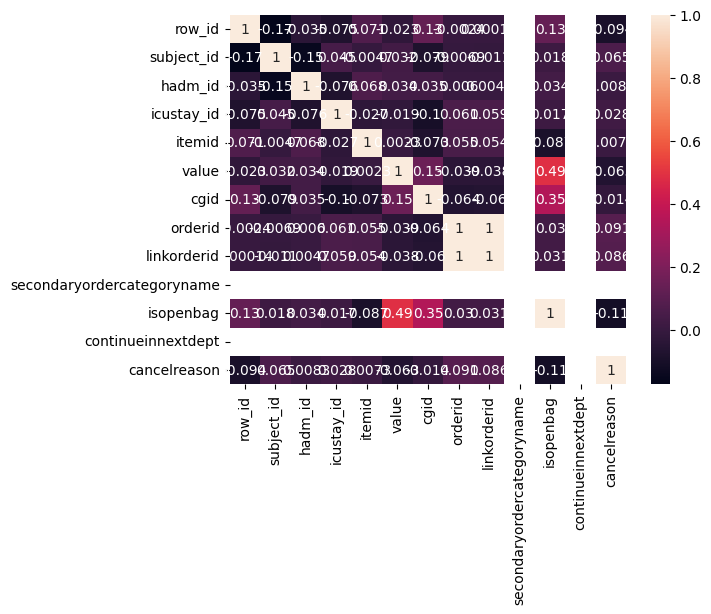

In [ ]:
# Gráfico de matriz de correlación
sns.heatmap(procedureevents_mv.corr(), annot=True)
plt.show()

In [ ]:
cptevents.head()

,row_id,subject_id,hadm_id,costcenter,chartdate,cpt_cd,cpt_number,cpt_suffix,ticket_id_seq,sectionheader,subsectionheader,description
0,4615,10117,105150,ICU,NaN,99254,99254,NaN,1.0,Evaluation and management,Consultations,NaN
1,4616,10117,105150,ICU,NaN,99231,99231,NaN,2.0,Evaluation and management,Hospital inpatient services,NaN
2,4617,10117,105150,ICU,NaN,90935,90935,NaN,3.0,Medicine,Dialysis,NaN
3,4618,10117,105150,ICU,NaN,99231,99231,NaN,4.0,Evaluation and management,Hospital inpatient services,NaN
4,7753,10111,174739,ICU,NaN,99253,99253,NaN,1.0,Evaluation and management,Consultations,NaN


In [ ]:
valores_edad = cptevents["costcenter"].unique()

print(valores_edad)

['ICU' 'Resp']


In [ ]:
cptevents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1579 entries, 0 to 1578
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_id            1579 non-null   int64  
 1   subject_id        1579 non-null   int64  
 2   hadm_id           1579 non-null   int64  
 3   costcenter        1579 non-null   object 
 4   chartdate         291 non-null    object 
 5   cpt_cd            1579 non-null   int64  
 6   cpt_number        1579 non-null   int64  
 7   cpt_suffix        0 non-null      float64
 8   ticket_id_seq     1288 non-null   float64
 9   sectionheader     1579 non-null   object 
 10  subsectionheader  1579 non-null   object 
 11  description       291 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 148.2+ KB


In [ ]:
cptevents.describe()

,row_id,subject_id,hadm_id,cpt_cd,cpt_number,cpt_suffix,ticket_id_seq
count,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,0.0,1288.000000
mean,254352.809373,30132.860038,157868.511083,94952.146928,94952.146928,NaN,34.559783
std,152033.453716,15398.361505,27904.711248,13529.257441,13529.257441,NaN,41.359769
min,4615.000000,10006.000000,100375.000000,11043.000000,11043.000000,NaN,1.000000
25%,136183.500000,10120.000000,138132.000000,94003.000000,94003.000000,NaN,7.000000
50%,238558.000000,40310.000000,163189.000000,99232.000000,99232.000000,NaN,18.000000
75%,275015.500000,42135.000000,182839.000000,99253.000000,99253.000000,NaN,44.000000
max,543399.000000,44228.000000,199395.000000,99367.000000,99367.000000,NaN,192.000000


In [ ]:
cptevents.isnull().sum()


row_id                 0
subject_id             0
hadm_id                0
costcenter             0
chartdate           1288
cpt_cd                 0
cpt_number             0
cpt_suffix          1579
ticket_id_seq        291
sectionheader          0
subsectionheader       0
description         1288
dtype: int64

C:\Users\W10-PC\AppData\Local\Temp\ipykernel_16156\2346038783.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cptevents.corr(), annot=True)


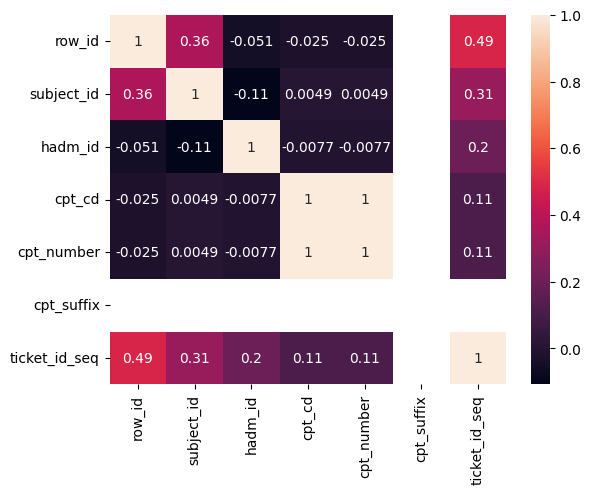

In [ ]:
# Gráfico de matriz de correlación
sns.heatmap(cptevents.corr(), annot=True)
plt.show()

In [ ]:
diagnoses_icd.head()

,row_id,subject_id,hadm_id,seq_num,icd9_code
0,112344,10006,142345,1,99591
1,112345,10006,142345,2,99662
2,112346,10006,142345,3,5672
3,112347,10006,142345,4,40391
4,112348,10006,142345,5,42731


In [ ]:
diagnoses_icd['icd9_code'].nunique()

581

In [ ]:
diagnoses_icd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   row_id      1761 non-null   int64 
 1   subject_id  1761 non-null   int64 
 2   hadm_id     1761 non-null   int64 
 3   seq_num     1761 non-null   int64 
 4   icd9_code   1761 non-null   object
dtypes: int64(4), object(1)
memory usage: 68.9+ KB


In [ ]:
diagnoses_icd.describe()

,row_id,subject_id,hadm_id,seq_num
count,1761.000000,1761.000000,1761.000000,1761.000000
mean,287797.360591,30392.649631,152515.138558,8.844974
std,132861.091209,15461.173204,27552.374513,6.315866
min,112344.000000,10006.000000,100375.000000,1.000000
25%,113177.000000,10094.000000,128293.000000,4.000000
50%,382072.000000,40687.000000,155297.000000,8.000000
75%,389325.000000,42199.000000,174863.000000,12.000000
max,397677.000000,44228.000000,199395.000000,37.000000


In [ ]:
diagnoses_icd.isnull().sum()

row_id        0
subject_id    0
hadm_id       0
seq_num       0
icd9_code     0
dtype: int64

C:\Users\W10-PC\AppData\Local\Temp\ipykernel_16156\1529851995.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(diagnoses_icd.corr(), annot=True)


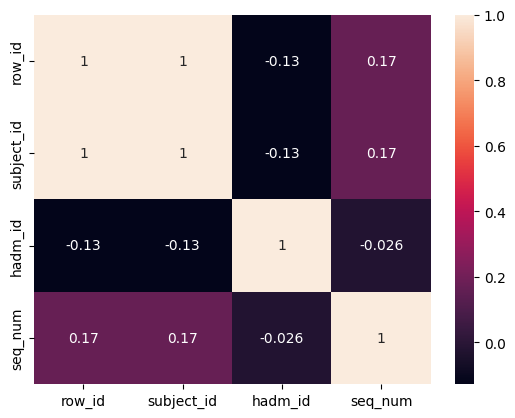

In [ ]:
sns.heatmap(diagnoses_icd.corr(), annot=True)
plt.show()

In [ ]:
# Obtener estadísticas descriptivas de la columna icd9_code
icd9_stats = diagnoses_icd["icd9_code"].describe()
icd9_stats

count     1761
unique     581
top       4019
freq        53
Name: icd9_code, dtype: object

In [ ]:
# Obtener la moda de la columna icd9_code
icd9_mode = diagnoses_icd["icd9_code"].mode()
icd9_mode

0    4019
Name: icd9_code, dtype: object

In [ ]:
# Contar la frecuencia de cada valor en la columna icd9_code
icd9_counts = diagnoses_icd["icd9_code"].value_counts()
icd9_counts

4019     53
42731    48
5849     45
4280     39
25000    31
         ..
8730      1
3361      1
E8231     1
34401     1
45182     1
Name: icd9_code, Length: 581, dtype: int64

#### Comentarios

- NOTEEVENTS ES UN DATASETS VACIO DE DATOS
  
OUTPUTEVENTS

+ EL VALOR 28000 DE LA COLUMNA VALUES PARECE OUT. EL VALOR ANTERIOR MAS GRANDE ES 5200
+ EN LA COLUMNA VALUEOM TODOS LOS VALORES SON ML, PERO ALGUNOS ESTAN ESCRITOS ml, mL.
+ LAS COLUMNAS CHARTTIME Y STORETIME ESTAN EN FORMATO OBJECT Y PODRIAN ESTAR EN FECHA Y HORA.
+ LAS COLUMNAS STOPPED, NEWBOTTLE, ISERROR ESTAN VACIAS

PROCEDUREEVENTS_MV

+ LA COLUMNA secondaryordercategoryname ESTA VACIA
+ LAS COLUMNAS CON FECHAS ESTAN EN FORMATO OBJECTS
+ LAS COLUMNAS comments ESTAN CASI VACIAS, MENOS DEL 10% DE LOS DATOS

CPTEVENTS

+ cpt_suffix ESTA VACIA
+ description TIENE EL 20% DE LOS DATOS

DIAGNOSES_ICD
+ SE RELACIONA CON d_icd_diagnoses MEDIANTE LA COLUMNA icd9_code


In [ ]:
#cgid conexion
caregivers

,row_id,cgid,label,description
0,2228,16174,RO,Read Only
1,2229,16175,RO,Read Only
2,2230,16176,Res,Resident/Fellow/PA/NP
3,2231,16177,RO,Read Only
4,2232,16178,RT,Respiratory
...,...,...,...,...
7562,6300,20303,MD,NaN
7563,6301,20304,RN,RN
7564,6302,20305,MDs,NaN
7565,6303,20306,RPH,Pharmacist


In [ ]:
caregivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7567 entries, 0 to 7566
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   row_id       7567 non-null   int64 
 1   cgid         7567 non-null   int64 
 2   label        7518 non-null   object
 3   description  5155 non-null   object
dtypes: int64(2), object(2)
memory usage: 236.6+ KB


In [ ]:
caregivers.isnull().sum()

row_id            0
cgid              0
label            49
description    2412
dtype: int64

In [ ]:
caregivers.duplicated().sum()

0

In [ ]:
print('Faltantes:',(caregivers['label'].isnull().sum()/len(caregivers)) * 100)

Faltantes: 0.6475485661424607


In [ ]:
# cambiar chartime and storetime // value,valueuom,resultstatus,stopped
chartevents

,row_id,subject_id,hadm_id,icustay_id,itemid,charttime,storetime,cgid,value,valuenum,valueuom,warning,error,resultstatus,stopped
0,5279021,40124,126179,279554.0,223761,2130-02-04 04:00:00,2130-02-04 04:35:00,19085,95.9,95.9,?F,0.0,0.0,NaN,NaN
1,5279022,40124,126179,279554.0,224695,2130-02-04 04:25:00,2130-02-04 05:55:00,18999,2222221.7,2222221.7,cmH2O,0.0,0.0,NaN,NaN
2,5279023,40124,126179,279554.0,220210,2130-02-04 04:30:00,2130-02-04 04:43:00,21452,15.0,15.0,insp/min,0.0,0.0,NaN,NaN
3,5279024,40124,126179,279554.0,220045,2130-02-04 04:32:00,2130-02-04 04:43:00,21452,94.0,94.0,bpm,0.0,0.0,NaN,NaN
4,5279025,40124,126179,279554.0,220179,2130-02-04 04:32:00,2130-02-04 04:43:00,21452,163.0,163.0,mmHg,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758350,274493917,44228,103379,217992.0,226228,2170-12-19 19:33:00,2170-12-19 19:33:00,20889,F,2.0,NaN,0.0,0.0,NaN,NaN
758351,274493918,44228,103379,217992.0,226381,2170-12-19 19:33:00,2170-12-19 19:33:00,20889,Single,1.0,NaN,0.0,0.0,NaN,NaN
758352,274493919,44228,103379,217992.0,226543,2170-12-19 19:33:00,2170-12-19 19:33:00,20889,Not specified,12.0,NaN,0.0,0.0,NaN,NaN
758353,274493920,44228,103379,217992.0,226544,2170-12-19 19:33:00,2170-12-19 19:33:00,20889,English,1.0,NaN,0.0,0.0,NaN,NaN


In [ ]:
#Columns (8,10,13,14) have mixed types.
chartevents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758355 entries, 0 to 758354
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   row_id        758355 non-null  int64  
 1   subject_id    758355 non-null  int64  
 2   hadm_id       758355 non-null  int64  
 3   icustay_id    758274 non-null  float64
 4   itemid        758355 non-null  int64  
 5   charttime     758355 non-null  object 
 6   storetime     758355 non-null  object 
 7   cgid          758355 non-null  int64  
 8   value         755630 non-null  object 
 9   valuenum      323884 non-null  float64
 10  valueuom      239855 non-null  object 
 11  warning       382279 non-null  float64
 12  error         382279 non-null  float64
 13  resultstatus  21674 non-null   object 
 14  stopped       374649 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 86.8+ MB


In [ ]:
chartevents.isnull().sum()

row_id               0
subject_id           0
hadm_id              0
icustay_id          81
itemid               0
charttime            0
storetime            0
cgid                 0
value             2725
valuenum        434471
valueuom        518500
warning         376076
error           376076
resultstatus    736681
stopped         383706
dtype: int64

In [ ]:
caregivers.duplicated().sum()

0

In [ ]:
print('Faltantes value:',(chartevents['value'].isnull().sum()/len(chartevents)) * 100)
print('Faltantes valueom:',(chartevents['valueuom'].isnull().sum()/len(chartevents)) * 100)
print('Faltantes warning:',(chartevents['warning'].isnull().sum()/len(chartevents)) * 100)
print('Faltantes error:',(chartevents['error'].isnull().sum()/len(chartevents)) * 100)
print('Faltantes resultstatus:',(chartevents['resultstatus'].isnull().sum()/len(chartevents)) * 100)
print('Faltantes stopped:',(chartevents['stopped'].isnull().sum()/len(chartevents)) * 100)

Faltantes value: 0.3593303927580091
Faltantes valueom: 68.37167289725788
Faltantes warning: 49.59102267407744
Faltantes error: 49.59102267407744
Faltantes resultstatus: 97.14197176783959
Faltantes stopped: 50.59714777379987


In [ ]:
# chartime and storetime, value (carga de datos)
datetimeevents.head()


,row_id,subject_id,hadm_id,icustay_id,itemid,charttime,storetime,cgid,value,valueuom,warning,error,resultstatus,stopped
0,208474,10076,198503,201006.0,5684,2107-03-25 04:00:00,2107-03-25 04:34:00,20482,2107-03-24 00:00:00,Date,NaN,NaN,NaN,NotStopd
1,208475,10076,198503,201006.0,5684,2107-03-25 07:00:00,2107-03-25 07:06:00,15004,2107-03-24 00:00:00,Date,NaN,NaN,NaN,NotStopd
2,208836,10076,198503,201006.0,5684,2107-03-26 04:00:00,2107-03-26 05:31:00,20834,2107-03-24 00:00:00,Date,NaN,NaN,NaN,NotStopd
3,208837,10076,198503,201006.0,5684,2107-03-26 08:00:00,2107-03-26 08:33:00,17480,2107-03-24 00:00:00,Date,NaN,NaN,NaN,NotStopd
4,208838,10076,198503,201006.0,5684,2107-03-26 16:00:00,2107-03-26 16:08:00,17480,2107-03-24 00:00:00,Date,NaN,NaN,NaN,NotStopd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15546,2314895,44228,103379,217992.0,224261,2170-12-19 12:04:00,2170-12-19 12:04:00,18602,2170-12-15 00:00:00,Date,0.0,0.0,NaN,NaN
15547,2314896,44228,103379,217992.0,224279,2170-12-19 12:04:00,2170-12-19 12:04:00,18602,2170-12-17 15:26:00,Date and Time,0.0,0.0,NaN,NaN
15548,2314897,44228,103379,217992.0,224280,2170-12-19 12:04:00,2170-12-19 12:04:00,18602,2170-12-15 00:00:00,Date,0.0,0.0,NaN,NaN
15549,2314898,44228,103379,217992.0,224282,2170-12-19 12:04:00,2170-12-19 12:04:00,18602,2170-12-15 00:00:00,Date,0.0,0.0,NaN,NaN


In [ ]:
datetimeevents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15551 entries, 0 to 15550
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   row_id        15551 non-null  int64  
 1   subject_id    15551 non-null  int64  
 2   hadm_id       15551 non-null  int64  
 3   icustay_id    15539 non-null  float64
 4   itemid        15551 non-null  int64  
 5   charttime     15551 non-null  object 
 6   storetime     15551 non-null  object 
 7   cgid          15551 non-null  int64  
 8   value         15467 non-null  object 
 9   valueuom      15551 non-null  object 
 10  warning       10914 non-null  float64
 11  error         10914 non-null  float64
 12  resultstatus  0 non-null      float64
 13  stopped       4637 non-null   object 
dtypes: float64(4), int64(5), object(5)
memory usage: 1.7+ MB


In [ ]:
datetimeevents.isnull().sum()

row_id              0
subject_id          0
hadm_id             0
icustay_id         12
itemid              0
charttime           0
storetime           0
cgid                0
value              84
valueuom            0
warning          4637
error            4637
resultstatus    15551
stopped         10914
dtype: int64

In [ ]:
caregivers.duplicated().sum()

0

In [ ]:
print('Faltantes value:',(datetimeevents['value'].isnull().sum()/len(datetimeevents)) * 100)
print('Faltantes valueom:',(datetimeevents['valueuom'].isnull().sum()/len(datetimeevents)) * 100)
print('Faltantes warning:',(datetimeevents['warning'].isnull().sum()/len(datetimeevents)) * 100)
print('Faltantes error:',(datetimeevents['error'].isnull().sum()/len(datetimeevents)) * 100)
print('Faltantes resultstatus:',(datetimeevents['resultstatus'].isnull().sum()/len(datetimeevents)) * 100)
print('Faltantes stopped:',(datetimeevents['stopped'].isnull().sum()/len(datetimeevents)) * 100)

Faltantes value: 0.5401581891839753
Faltantes valueom: 0.0
Faltantes warning: 29.818018133882067
Faltantes error: 29.818018133882067
Faltantes resultstatus: 100.0
Faltantes stopped: 70.18198186611794


In [ ]:
imputeventscv

,row_id,subject_id,hadm_id,icustay_id,charttime,itemid,amount,amountuom,rate,rateuom,...,orderid,linkorderid,stopped,newbottle,originalamount,originalamountuom,originalroute,originalrate,originalrateuom,originalsite
0,1184,10114,167957,234989,2171-11-03 15:00:00,30056,400.0,ml,NaN,NaN,...,2557279,2557279,NaN,NaN,NaN,ml,Oral,NaN,NaN,NaN
1,1185,10114,167957,234989,2171-11-03 20:00:00,30056,120.0,ml,NaN,NaN,...,7828849,2557279,NaN,NaN,NaN,ml,Oral,NaN,NaN,NaN
2,1186,10114,167957,234989,2171-11-03 23:00:00,30056,120.0,ml,NaN,NaN,...,2744159,2557279,NaN,NaN,NaN,ml,Oral,NaN,NaN,NaN
3,1187,10114,167957,234989,2171-11-04 02:00:00,30056,120.0,ml,NaN,NaN,...,8475006,2557279,NaN,NaN,NaN,ml,Oral,NaN,NaN,NaN
4,1188,10114,167957,234989,2171-11-04 05:00:00,30056,120.0,ml,NaN,NaN,...,11183474,2557279,NaN,NaN,NaN,ml,Oral,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34794,17489341,10112,188574,224063,2148-01-16 10:00:00,40864,42.0,ml,NaN,NaN,...,10084700,4180996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34795,17489342,10112,188574,224063,2148-01-16 11:00:00,40864,42.0,ml,NaN,NaN,...,1291088,4180996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34796,17489343,10112,188574,224063,2148-01-16 12:00:00,40864,42.0,ml,NaN,NaN,...,5965006,4180996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34797,17489344,10112,188574,224063,2148-01-16 13:00:00,40864,42.0,ml,NaN,NaN,...,2924959,4180996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
imputeventscv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13224 entries, 0 to 13223
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   row_id                         13224 non-null  int64  
 1   subject_id                     13224 non-null  int64  
 2   hadm_id                        13224 non-null  int64  
 3   icustay_id                     13224 non-null  int64  
 4   starttime                      13224 non-null  object 
 5   endtime                        13224 non-null  object 
 6   itemid                         13224 non-null  int64  
 7   amount                         13224 non-null  float64
 8   amountuom                      13224 non-null  object 
 9   rate                           7335 non-null   float64
 10  rateuom                        7335 non-null   object 
 11  storetime                      13224 non-null  object 
 12  cgid                           13224 non-null 

In [ ]:
#comments = comentarios
imputeventscv.isnull().sum()

row_id                               0
subject_id                           0
hadm_id                              0
icustay_id                           0
starttime                            0
endtime                              0
itemid                               0
amount                               0
amountuom                            0
rate                              5889
rateuom                           5889
storetime                            0
cgid                                 0
orderid                              0
linkorderid                          0
ordercategoryname                    0
secondaryordercategoryname        3385
ordercomponenttypedescription        0
ordercategorydescription             0
patientweight                        0
totalamount                       1440
totalamountuom                    1433
isopenbag                            0
continueinnextdept                   0
cancelreason                         0
statusdescription        

In [ ]:
caregivers.duplicated().sum()

0

In [ ]:
print('Faltantes rate:',(imputeventscv['rate'].isnull().sum()/len(imputeventscv)) * 100)
print('Faltantes rateuom:',(imputeventscv['rateuom'].isnull().sum()/len(imputeventscv)) * 100)
print('Faltantes totalamount:',(imputeventscv['totalamount'].isnull().sum()/len(imputeventscv)) * 100)
print('Faltantes totalamountuom:',(imputeventscv['totalamountuom'].isnull().sum()/len(imputeventscv)) * 100)


Faltantes rate: 44.53266787658802
Faltantes rateuom: 44.53266787658802
Faltantes totalamount: 10.88929219600726
Faltantes totalamountuom: 10.836358136721113


In [ ]:
imputeventsmv.head()

,row_id,subject_id,hadm_id,icustay_id,starttime,endtime,itemid,amount,amountuom,rate,...,totalamountuom,isopenbag,continueinnextdept,cancelreason,statusdescription,comments_editedby,comments_canceledby,comments_date,originalamount,originalrate
0,118897,42367,139932,250305,2147-10-29 16:45:00,2147-10-29 16:46:00,225799,60.000000,ml,NaN,...,ml,0,0,0,FinishedRunning,NaN,NaN,NaN,60.0,60.000000
1,118898,42367,139932,250305,2147-10-20 13:17:00,2147-10-20 13:18:00,223258,10.000000,units,NaN,...,NaN,0,0,1,Rewritten,NaN,RN,2147-10-20 13:18:00,10.0,10.000000
2,118899,42367,139932,250305,2147-10-29 03:23:00,2147-10-29 03:53:00,226089,99.999999,ml,199.999998,...,ml,0,0,0,FinishedRunning,NaN,NaN,NaN,100.0,200.000000
3,118900,42367,139932,250305,2147-10-22 22:00:00,2147-10-22 22:01:00,225799,40.000000,ml,NaN,...,ml,0,0,0,FinishedRunning,NaN,NaN,NaN,40.0,40.000000
4,118901,42367,139932,250305,2147-10-16 06:21:00,2147-10-17 06:10:00,225936,1309.899995,ml,54.999300,...,ml,0,0,0,FinishedRunning,NaN,NaN,NaN,1309.9,54.999298


In [ ]:
imputeventsmv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13224 entries, 0 to 13223
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   row_id                         13224 non-null  int64  
 1   subject_id                     13224 non-null  int64  
 2   hadm_id                        13224 non-null  int64  
 3   icustay_id                     13224 non-null  int64  
 4   starttime                      13224 non-null  object 
 5   endtime                        13224 non-null  object 
 6   itemid                         13224 non-null  int64  
 7   amount                         13224 non-null  float64
 8   amountuom                      13224 non-null  object 
 9   rate                           7335 non-null   float64
 10  rateuom                        7335 non-null   object 
 11  storetime                      13224 non-null  object 
 12  cgid                           13224 non-null 

In [ ]:
imputeventsmv.isnull().sum()

row_id                               0
subject_id                           0
hadm_id                              0
icustay_id                           0
starttime                            0
endtime                              0
itemid                               0
amount                               0
amountuom                            0
rate                              5889
rateuom                           5889
storetime                            0
cgid                                 0
orderid                              0
linkorderid                          0
ordercategoryname                    0
secondaryordercategoryname        3385
ordercomponenttypedescription        0
ordercategorydescription             0
patientweight                        0
totalamount                       1440
totalamountuom                    1433
isopenbag                            0
continueinnextdept                   0
cancelreason                         0
statusdescription        

In [ ]:
imputeventsmv.duplicated().sum()

0

In [ ]:
print('Faltantes rate:',(imputeventsmv['rate'].isnull().sum()/len(imputeventsmv)) * 100)
print('Faltantes rateuom:',(imputeventsmv['rateuom'].isnull().sum()/len(imputeventsmv)) * 100)
print('Faltantes totalamount:',(imputeventsmv['totalamount'].isnull().sum()/len(imputeventsmv)) * 100)
print('Faltantes totalamountuom:',(imputeventsmv['totalamountuom'].isnull().sum()/len(imputeventsmv)) * 100)

Faltantes rate: 44.53266787658802
Faltantes rateuom: 44.53266787658802
Faltantes totalamount: 10.88929219600726
Faltantes totalamountuom: 10.836358136721113


In [ ]:
transfers

,row_id,subject_id,hadm_id,icustay_id,dbsource,eventtype,prev_careunit,curr_careunit,prev_wardid,curr_wardid,intime,outtime,los
0,54440,10006,142345,206504.0,carevue,admit,NaN,MICU,NaN,52.0,2164-10-23 21:10:15,2164-10-25 12:21:07,39.18
1,54441,10006,142345,NaN,carevue,transfer,MICU,NaN,52.0,45.0,2164-10-25 12:21:07,2164-11-01 17:14:27,172.89
2,54442,10006,142345,NaN,carevue,discharge,NaN,NaN,45.0,NaN,2164-11-01 17:14:27,NaN,NaN
3,54460,10011,105331,232110.0,carevue,admit,NaN,MICU,NaN,15.0,2126-08-14 22:34:00,2126-08-28 18:59:00,332.42
4,54461,10011,105331,NaN,carevue,discharge,MICU,NaN,15.0,NaN,2126-08-28 18:59:00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,182044,44222,192189,NaN,metavision,discharge,CCU,NaN,7.0,NaN,2180-07-20 14:48:45,NaN,NaN
520,182055,44228,103379,NaN,metavision,admit,NaN,NaN,NaN,54.0,2170-12-15 03:15:39,2170-12-15 04:41:39,1.43
521,182056,44228,103379,217992.0,metavision,transfer,NaN,SICU,54.0,57.0,2170-12-15 04:41:39,2170-12-19 19:33:09,110.86
522,182057,44228,103379,NaN,metavision,transfer,SICU,NaN,57.0,54.0,2170-12-19 19:33:09,2170-12-24 17:59:13,118.43


In [ ]:
transfers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524 entries, 0 to 523
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row_id         524 non-null    int64  
 1   subject_id     524 non-null    int64  
 2   hadm_id        524 non-null    int64  
 3   icustay_id     167 non-null    float64
 4   dbsource       524 non-null    object 
 5   eventtype      524 non-null    object 
 6   prev_careunit  167 non-null    object 
 7   curr_careunit  167 non-null    object 
 8   prev_wardid    395 non-null    float64
 9   curr_wardid    395 non-null    float64
 10  intime         524 non-null    object 
 11  outtime        395 non-null    object 
 12  los            395 non-null    float64
dtypes: float64(4), int64(3), object(6)
memory usage: 53.3+ KB


In [ ]:
transfers.isnull().sum()

row_id             0
subject_id         0
hadm_id            0
icustay_id       357
dbsource           0
eventtype          0
prev_careunit    357
curr_careunit    357
prev_wardid      129
curr_wardid      129
intime             0
outtime          129
los              129
dtype: int64

In [ ]:
imputeventsmv.duplicated().sum()

0

In [ ]:
print('Faltantes rate:',(transfers['icustay_id'].isnull().sum()/len(transfers)) * 100)
print('Faltantes rate:',(transfers['prev_careunit'].isnull().sum()/len(transfers)) * 100)
print('Faltantes rate:',(transfers['curr_careunit'].isnull().sum()/len(transfers)) * 100)
print('Faltantes rate:',(transfers['prev_wardid'].isnull().sum()/len(transfers)) * 100)
print('Faltantes rate:',(transfers['prev_wardid'].isnull().sum()/len(transfers)) * 100)
print('Faltantes rate:',(transfers['outtime'].isnull().sum()/len(transfers)) * 100)
print('Faltantes rate:',(transfers['los'].isnull().sum()/len(transfers)) * 100)

Faltantes rate: 68.12977099236642
Faltantes rate: 68.12977099236642
Faltantes rate: 68.12977099236642
Faltantes rate: 24.61832061068702
Faltantes rate: 24.61832061068702
Faltantes rate: 24.61832061068702
Faltantes rate: 24.61832061068702
